# FFT Y FILTRO NOTCH

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack as fft
import cv2
from numpy import fft

478 640


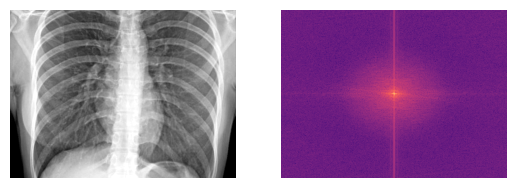

In [4]:
archivo = '/home/paul/Documentos/Personal/UIDE/MATERIAS/Semana 2/PRACTICAS/Data/img2.png'
img = cv2.imread(archivo,0) # escala de grises
rows, cols = img.shape
print(rows, cols)

img_fft = fft.fftshift(fft.fft2(img))
magnitud = np.abs(img_fft)

# convertirlo en escala logaritmica
magnitud_log = 20 * np.log(1+magnitud)

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(magnitud_log, cmap='magma')
plt.axis('off')
plt.show()

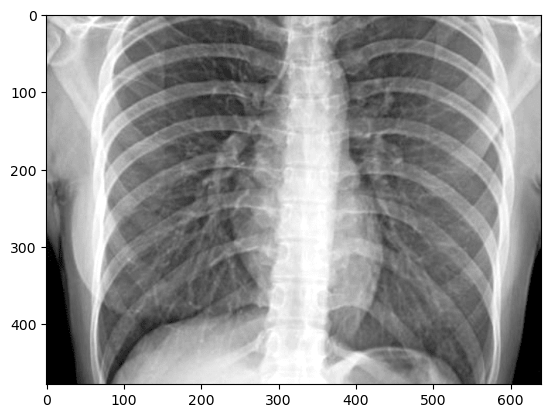

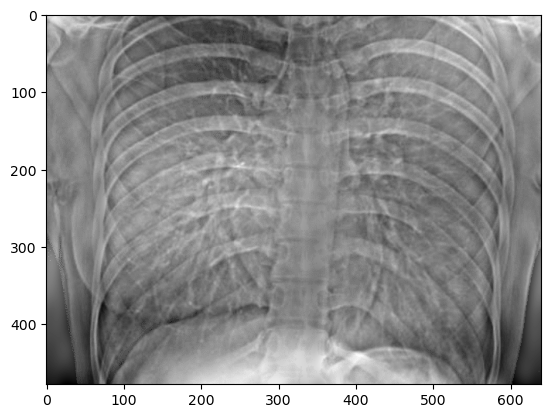

In [9]:
busqueda_maximos = magnitud.copy()
radio_exclusion = 10 # px
centro_y, centro_x = rows // 2, cols // 2
cv2.circle(busqueda_maximos, (centro_x, centro_y), radio_exclusion, 0, -1)


# encontrar las cordenadas de interferencia
y_ruido, x_ruido = np.unravel_index(np.argmax(busqueda_maximos), busqueda_maximos.shape)

# calcular las distancias de frecuencias hacia el centro
dist_x = x_ruido - centro_x
dist_y = y_ruido - centro_y

# crear máscara del filtro
mask = np.ones((rows, cols), dtype= np.float32)

#Dibujar el ruido detectado

cv2.circle(mask,(x_ruido,y_ruido), radio_exclusion, 0, -1)

# dibujamos un parche para Fourier
cv2.circle(mask,(centro_x-dist_x,centro_y-dist_y), radio_exclusion, 0, -1)

# aplicar el filtro y regresar info a rgb

f_filtrado = img_fft * mask
img_limpia = np.abs(fft.ifft2(fft.ifftshift(f_filtrado)))

plt.imshow(img, cmap = 'gray')
plt.show()
plt.imshow(img_limpia, cmap = 'gray')
plt.show()